In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

In [2]:
from sklearn.datasets import make_blobs
X, y_train = make_blobs(n_samples = 300, centers = 4, 
                        cluster_std = 0.5, random_state = 0)


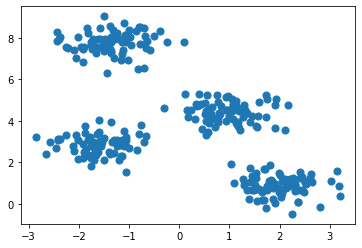

In [3]:
plt.scatter(X[:,0], X[:,1], s = 50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [5]:
y_kmeans

array([2, 0, 3, 0, 2, 2, 1, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 1, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 3, 1, 3, 3,
       1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 3, 0, 1, 1, 1,
       0, 2, 0, 1, 3, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3,
       0, 0, 3, 2, 0, 1, 1, 3, 2, 2, 3, 1, 0, 2, 0, 2, 3, 2, 2, 3, 0, 3,
       1, 1, 2, 0, 2, 3, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 1, 0, 3, 0, 0, 1, 3, 1, 3, 1, 0, 3, 0, 0, 0, 3, 0, 3,
       2, 1, 0, 1, 2, 3, 0, 3, 3, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 3, 1, 0,
       2, 2, 3, 1, 2, 3, 1, 1, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 0, 3, 1, 2, 1, 3, 0, 1, 0, 3, 0, 3, 1, 3, 3, 0, 1, 1, 2, 2, 3,
       0, 2, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 3, 2, 1, 3, 2, 1, 0, 1, 2, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 3, 1, 2, 3, 1, 1, 1, 2, 2, 0, 3, 3, 1, 2,
       0, 1, 3, 0, 3, 2, 2, 1, 1, 3, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 2, 3, 0, 1])

[[-1.35241261  7.76731726]
 [-1.57480456  2.84532424]
 [ 1.99469693  0.8727049 ]
 [ 0.95415778  4.39985544]]


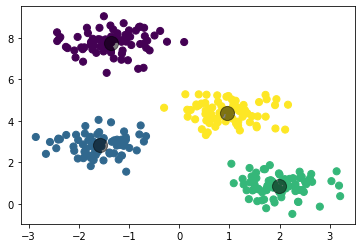

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Implementation 

In [7]:
class KMeans:
    def __init__(self, k, method='k-means++', max_iter=300):
        self.k = k 
        self.method = method
        self.max_iter = max_iter
    
    def init_centers(self, X):
        if self.method == 'random':
            return X[np.random.choice(len(X), self.k, replace=False)]
        if self.method == 'k-means++':
            centroids = [X[np.random.choice(len(X))]]
            while len(centroids)<self.k:
                distances = pairwise_distances(X, centroids).min(axis=1)
                new_i = np.random.choice(len(X), p=(distances**2).reshape(-1)/sum(distances**2))
                centroids.append(X[new_i])
            print(centroids)
            return np.array(centroids)
    
    def fit(self, X):
        self.centroids = self.init_centers(X)
        for _ in range(self.max_iter):
            clusters = self.expectation(X, self.centroids)
            new_centroids = self.maximization(X, clusters)
            # if np.array_equal(new_centroids, self.centroids)
            if (new_centroids == self.centroids).all():
                break
            self.centroids = new_centroids
            
    def expectation(self, X, centroids):
        return pairwise_distances_argmin(X, centroids)

    def maximization(self, X, clusters):
        return np.array([X[clusters==i].mean(axis=0) for i in range(self.k)])
        
    def predict(self, X):
        return self.expectation(X, self.centroids)
 

In [8]:
kmeans = KMeans(k=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

[array([1.03992529, 1.92991009]), array([-1.57828393,  7.92336949]), array([-1.53474507,  2.99834635]), array([0.38970838, 5.27559792])]


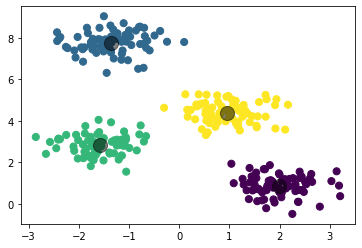

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);